# Assignment 1: PCA- tSNE

## Note
* Use Google Colab to do this assignment.
* Don't change existing code or text.
* Add code and write text as instructed.

## Submission
* File > Download .ipynb
* Submit .ipynb file on the Learn.  

## Submission Notes
(Please write any notes here that you think we should know during marking)

# [NO MARKS] PCA Warming Up (MUST READ)

Some code to illustrate examples of PCA using sklearn library.

**Let's create some random `5d` data**

In [1]:
import numpy as np
from sklearn.decomposition import PCA

# 100 points of 5d data
data = np.random.rand(100, 5)

**Lets convert this `5d` data to `2d` using `PCA`**


In [ ]:
# n_components=2 because I want to convert 5d data to 2d i.e, d=5 and k=2 based on the notation in Tutorial.
pca = PCA(n_components=2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In code above when we call `fit`, it populates two things in `pca`:
1. `mean_`
2. `components_`

In [ ]:
# mean of the input data (per dimension) used to zeroying the mean
pca.mean_

array([0.53468943, 0.46823471, 0.5311124 , 0.47251279, 0.51244455])

In [ ]:
# basis vectors: k by d projection marix (this is the transposed of projection matrix based on notation in the Tutorial.)
pca.components_

array([[-0.40982532, -0.35914285, -0.59989808, -0.08442276, -0.57970226],
       [-0.76458402,  0.41680251, -0.05608778,  0.39855178,  0.28230761]])

Now we are ready to transform `5d` from `data` into `2d` using following code

In [ ]:
data_to_reduce = data[:10]
reduced_data = np.dot(data_to_reduce - pca.mean_, pca.components_.T)

# reduced data from 5d to 2d
reduced_data.shape

(10, 2)

You can accomplish the same using `transform` function provided in `pca`

In [ ]:
pca.transform(data_to_reduce).shape

(10, 2)

Time for inverse transform or changing `2d` data back to `5d`

Compression --> Decompression

In [ ]:
decompressed_data = np.dot(reduced_data, pca.components_)+pca.mean_
decompressed_data

array([[0.43263531, 0.73973214, 0.73477697, 0.63615229, 0.82100481],
       [0.47851715, 0.41871242, 0.44859771, 0.46078965, 0.43261587],
       [0.27097321, 0.61815037, 0.5177869 , 0.61312789, 0.61753944],
       [0.69460652, 0.74646954, 0.90027676, 0.57610824, 0.91193794],
       [0.90208795, 0.51278778, 0.7975535 , 0.40626506, 0.68402357],
       [0.3592174 , 0.60234277, 0.5558526 , 0.5836535 , 0.62548581],
       [0.34414018, 0.7058556 , 0.64795969, 0.64026769, 0.75063287],
       [0.1841093 , 0.22318263, 0.07875172, 0.43210348, 0.09456272],
       [0.32615765, 0.36397707, 0.30263746, 0.4697112 , 0.31596212],
       [0.90459577, 0.4148466 , 0.70327193, 0.35554779, 0.5619108 ]])

In [ ]:
# same can we accomplished using inverse_transform
pca.inverse_transform(pca.transform(data_to_reduce))

array([[0.43263531, 0.73973214, 0.73477697, 0.63615229, 0.82100481],
       [0.47851715, 0.41871242, 0.44859771, 0.46078965, 0.43261587],
       [0.27097321, 0.61815037, 0.5177869 , 0.61312789, 0.61753944],
       [0.69460652, 0.74646954, 0.90027676, 0.57610824, 0.91193794],
       [0.90208795, 0.51278778, 0.7975535 , 0.40626506, 0.68402357],
       [0.3592174 , 0.60234277, 0.5558526 , 0.5836535 , 0.62548581],
       [0.34414018, 0.7058556 , 0.64795969, 0.64026769, 0.75063287],
       [0.1841093 , 0.22318263, 0.07875172, 0.43210348, 0.09456272],
       [0.32615765, 0.36397707, 0.30263746, 0.4697112 , 0.31596212],
       [0.90459577, 0.4148466 , 0.70327193, 0.35554779, 0.5619108 ]])

In [ ]:
# Lets find compression decompression error (absolute mean error)
np.sum(np.abs(data_to_reduce - decompressed_data))/data_to_reduce.size

0.15837103404923625

# PCA 


## Problem 1: PCA objective function [35 marks]


## 1-a) [10 marks]
Show that minimizing the reconstruction loss in PCA i.e,

\begin{equation}
\begin{aligned}
& \underset{\mathbf{W}}{\text{arg min}} &&   \| \mathbf{X}-\mathbf{X}\mathbf{W}\mathbf{W}^T \| ^2_F,  \quad \mathbf{W}^T \mathbf{W}=\mathbf{I}_k, \quad (1)
\end{aligned}
\end{equation}

is equivalent to maximizing variance in all orthogonal projction directions i.e,

$$
\underset{\mathbf{W}}{\text{arg max}} \quad \textrm{Tr}\{\mathbf{W}^{T}\mathbf{X}^{T}\mathbf{X}\mathbf{W}\}\quad
\textrm{s.t.} \quad  \mathbf{W}^T \mathbf{W}=\mathbf{I}_k, \quad (2)
$$
where $ \textrm{Tr}$ is trace function, $\| .\|_F$ is frobenius norm, $\mathbf{X}$ is $n$ by $d$ data matrix ($n$ number of data points and $d$ dimensionality), $\mathbf{W}$ is a $d$ by $k$  projection matrix, and $\mathbf{I}_k$ is $k$ by $k$ identity matrix.

Hint 1: Try to expand the frobenus norm in relation (1) and note that $\mathbf{W}^T \mathbf{W}=\mathbf{I}_k$.

Hint 2: In order to show this you may use Trace of a product and Cyclic property of the Trace function. You can read about Cyclic property of Trace function [here](https://en.wikipedia.org/wiki/Trace_(linear_algebra)). <br>
<br>


Answer to 1-a):

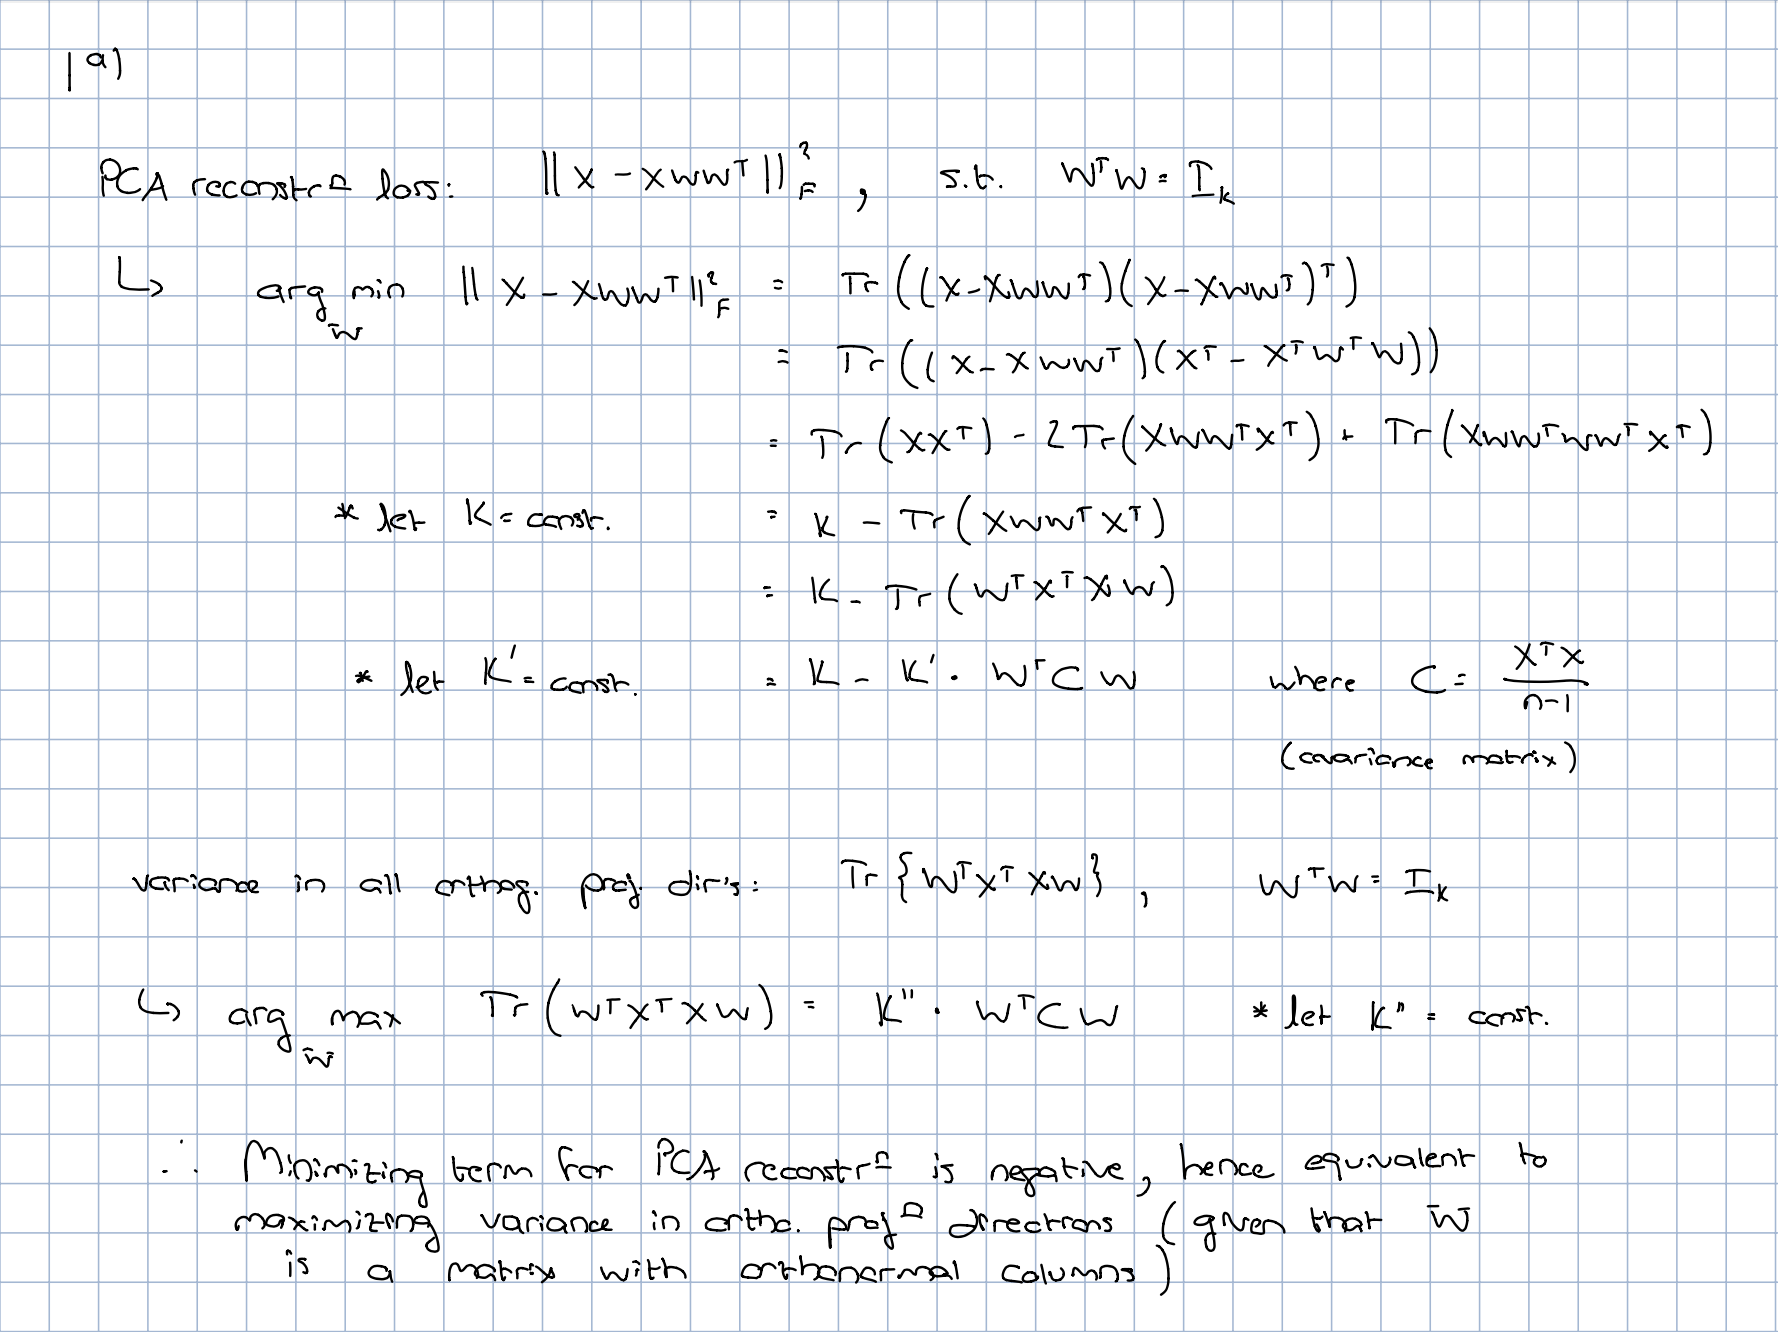


## 1-b) [10 marks]
Show that projection matrix in PCA i.e, $\mathbf{W}$ is rotation invariant .
Hint: You need to show that if we replace $\mathbf{W}$ with $\mathbf{W}\mathbf{R}$ where $\mathbf{R}$ is a $k$ by $k$ rotation matrix (rotation matrix is a square orthohonal matrix such that $\mathbf{R}^T\mathbf{R}=\mathbf{R}\mathbf{R}^T=\mathbf{I}_k$) then the objective value in relation (2) is the same.

Hint: In order to show this you may use Trace of a product and Cyclic property of the Trace function. You can read about Cyclic property of Trace function [here](https://en.wikipedia.org/wiki/Trace_(linear_algebra)).

Answer to 1-b):

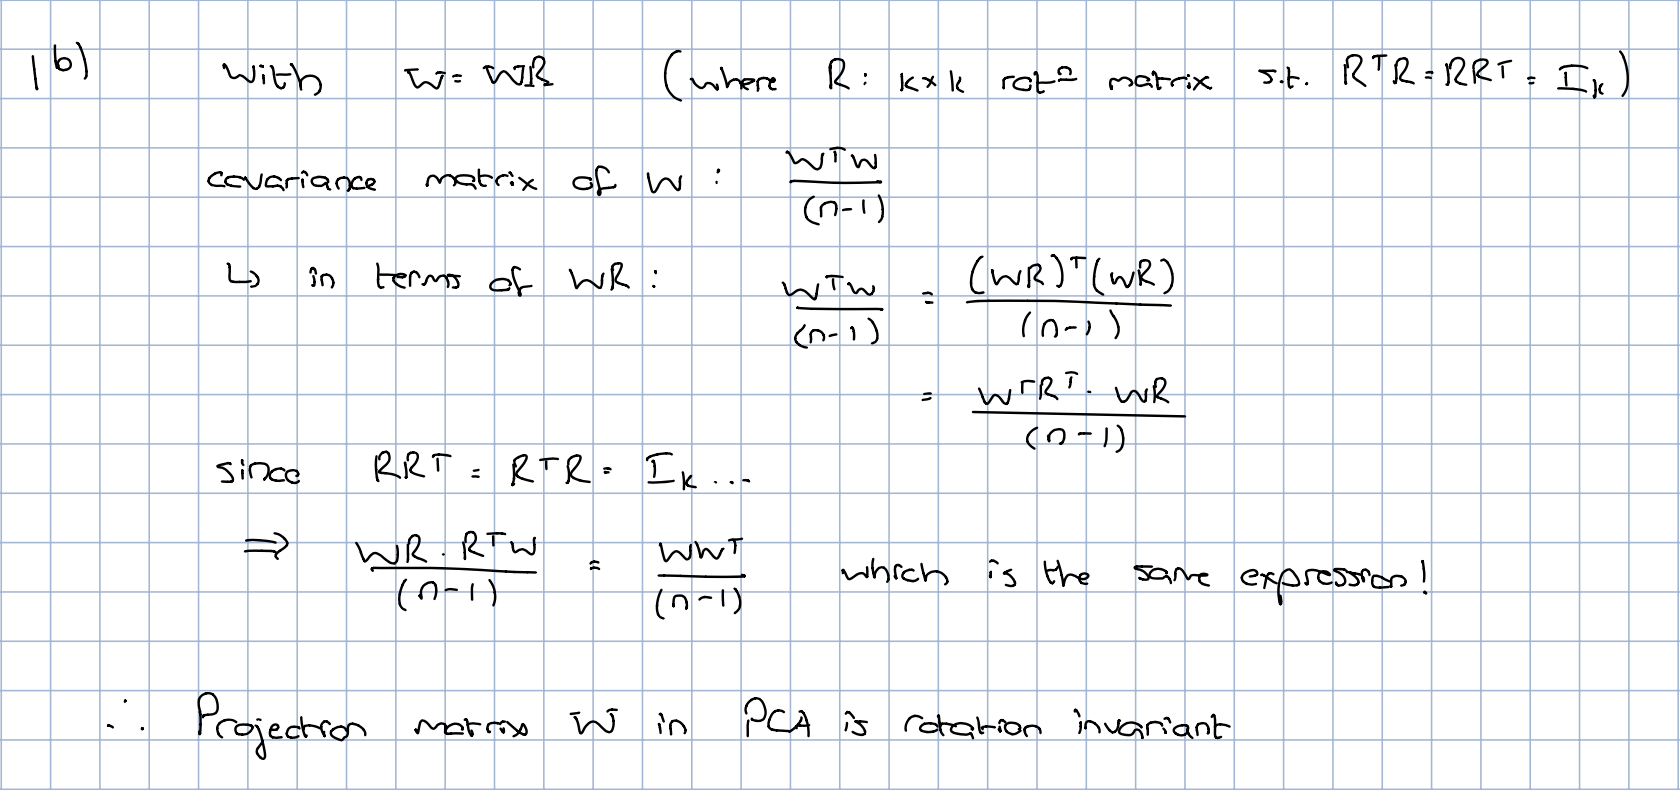

## 1-c) [10 marks] 
Assume we have the data matrix 
$\mathbf{X}$ $n$ by $d$  ($n$ number of data points and $d$ dimensionality), and the projection martix $\mathbf{W}$ ($d$ by $k$) from PCA algorithm. Explain in detail how we can use this $\mathbf{W}$ to denoise $\mathbf{X}$? <br>

write the mathematical exparession for calcuating the denoised data and explain role of $k$ in denoising.

Answer to 1-c):

Data matrix X has dimensionality of d, while the projection matrix W through PCA has a dimensionality of k (where k < d). Multiplying XW provides a result with overall dimensionality of k - as the projected data loses information in projection directions with the least variance. In order to preserve information within the projected data, a sufficient value of k (not too small) should be chosen such that the appropriate noise is removed from the data.

In order to return the data matrix to its original form, X must be multipled by the product of projection matrix and its transposition. Hence, the denoised data can be represented by:
\begin{equation}
\mathbf{X = XWW^T}
\end{equation}


## 1-d) [5 marks] 
For a $d$ dimensional data, you can ALWAYS reconstruct the data with 0\% error if all $d$ PCAs are used. In other words if we set $k$ equal to $d$ in the relation (1) we can obtain a $\mathbf{W}$ such that the reconstruction loss $\| \mathbf{X}-\mathbf{X}\mathbf{W}\mathbf{W}^T \| ^2_F$ is zero.

- True
- False

Answer to 1-d): Write True or False.

True

## Problem 2: Visualize eigenvectors in face dataset: Eigenfaces [35 marks]

We know that $k$ columns of projection matrix $\mathbf{W}$ where $\mathbf{W}$ is $d$ by $k$ ($d$ original dimenionality and $k$ dimensionality of projected data) or equally top $k$ eigenvectors associated with $k$ largest eigenvalues of covariance matrix show projection directiond with highest variances. <br>

In this question, we want to apply PCA on face dataset and visulize the the columns of projection matrix (principal components) as face images.



The following code load the face dataset:

In [5]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.images.shape)

(1348, 62, 47)


Clearly there are 1348 images each with the size of (62,47). The following code plot the first 7 images in this dataset:

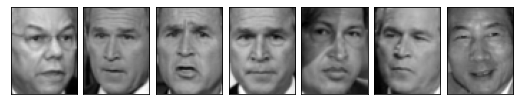

In [6]:
# Plot the images
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 7, figsize=(9, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(7):
    ax[i].imshow(faces.images[i], cmap='binary_r')

## 2-a) [5 marks]
Use reshpe metod to reshpe this data from (1348, 62, 47)
to (1348, 2914) such that X is the reshaped data:


In [7]:
# write your code here to reshape the data
X = np.reshape(faces.images, (1348, 2914))

## 2-b) [5 marks]
Import PCA from sklearn and fit your model on X dataset using 150 principal components.

In [ ]:
# write your code here
pca = PCA(n_components=150)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

##2-c) [5 marks]
The components_ attribute return the projection matrix in $k$ by $d$ format i.e, each row is an eigenvector. Choose the first eigenvector of the covariance matrix (first row in of projection matrix extracted by components_ attribute), this should be a 1 by $d$ (here 1 by 2914) vector.

Try to reshape it to a (62 by 47) matrix and visualize it as a grey scalse image.

Hint: use plt.imshow("your image here", cmap='bone') to visualize this eigenvector (eigenface).

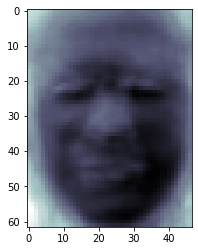

In [ ]:
# Write you code here
img = pca.components_[0].reshape(62, 47)
plt.imshow(img, cmap='bone')

##2-d) [5 marks]
Please explain your intuition about the viuslized eigenvector as an image in 2-3 lines. What does it mean? What does it look like?

Write your answer to 2-d here:

The first eigenvector of the covariance matrix is a result of dimensionality reduction through PCA on the given information. This 0th eigenface represents the direction along which the data set has maximum variance. Reshaping and plotting the principal projection, the resultant image resembles a human face showing image lighting and general facial contours.

## 2-e) [5 marks]
Use plt.subplots to visualize the first 50 eigenfaces. Visualize them in a 5 by 10 array of eigenfaces using subplots.

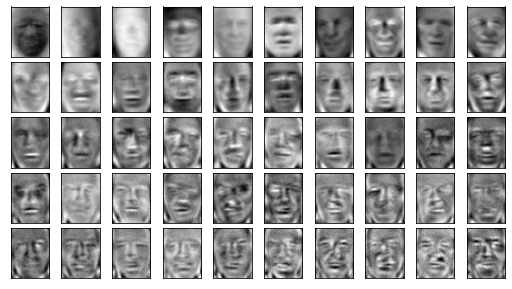

In [36]:
# write your code here to Plot the first 50 eigenfaces
rows, cols = 5, 10
fig, ax = plt.subplots(rows, cols, figsize=(9, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, a in enumerate(ax.flat):
  a.imshow(pca.components_[i].reshape(62, 47), cmap='binary_r')

## 2-f) [5 marks]
Repeat part 2-b but this time with 1348 components. Then
use plt.subplots to visualize the **last** 50 eigenfaces. Visualize them in a 5 by 10 array of eigenfaces.

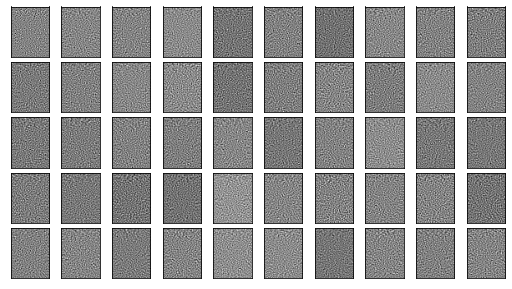

In [84]:
# write your code here to Plot the last 50 eigenfaces
pca = PCA(n_components=1348)
pca.fit(X)

fig, ax = plt.subplots(rows, cols, figsize=(9, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
# reverse for last components
reverse_comps = pca.components_[::-1]
for i, a in enumerate(ax.flat):
  a.imshow(reverse_comps[i].reshape(62, 47), cmap='binary_r')


##2-g) [5 marks]
Please explain your intuition about the viuslized eigenfaces in 2-3 lines. what do they mean? why do they looklike?

Write your answer to 2-g here:

Visualizing the eigenfaces generates a directional representation of vectors for the data set (face space). From first to last, each eigenvector of the covariance matrix shows the direction of max data variance, followed by direction of greatest variance among eigenvectors orthogonal to the first, followed by direction of greatest variance among those orthogonal to the first two, etc. They look alike because of the ordering by this variance, each component resembling its neighbouring eigenfaces depending on position (i.e. focusing on angle of facial lighting and moving towards specific features such as eyes, nose, lips).

## Problem 3: Denoising by PCA [15 marks]

Run the following cell to load and visualize the faces again:

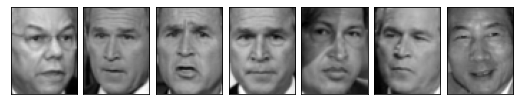

In [20]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

# Plot the images
fig, ax = plt.subplots(1, 7, figsize=(9, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(7):
    ax[i].imshow(faces.images[i], cmap='binary_r')

Use reshpe metod to reshpe this data from (1348, 62, 47)
to (1348, 2914) such that X is the reshaped data:


In [21]:
#write your code here to reshape the data
X = np.reshape(faces.images, (1348, 2914))

##3-a) [5 marks]
Generate a random matrix sampled from normal distribution with mean equal to 1 and standard deviation equal to 20 with the size of X. Name this matrix noise and add this to the X to get noisy_X. Then run the cell to visualize some of the noisy images.

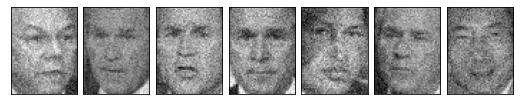

In [30]:
# write your code here
noise = np.random.normal(1, 20, (1348, 2914))
noisy_X = noise + X
fig, ax = plt.subplots(1, 7, figsize=(9, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(7):
    ax[i].imshow(noisy_X[i].reshape(62, 47), cmap='binary_r')

##3-b) [5 marks]
Denose the images using PCA algorithm. Choose $k$ such that 80 % of variance in data is captured. name the denoised data "filtered".

In [90]:
# write the denoising code here name the denoised data "filtered"
pca = PCA(0.80).fit(noisy_X)
comps = pca.transform(noisy_X)
filtered = pca.inverse_transform(comps)

Run the next cell to visualize some of the denoised images.

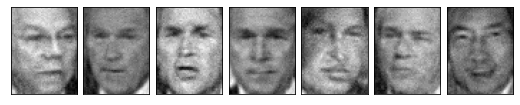

In [32]:
fig, ax = plt.subplots(1, 7, figsize=(9, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(7):
    ax[i].imshow(filtered[i].reshape(62, 47), cmap='binary_r')

##3-c) [5 marks]
Repeat 3-b with the  $k$ that it captures 40 % of variance in data and then visiualize the first 7 denoised images. Compare the results of 3-c with 3-b and write your conclusion in 2-3 lines.

In [91]:
# write the denoising code here name the denoised data "filtered"
pca = PCA(0.4).fit(noisy_X)
comps = pca.transform(noisy_X)
filtered = pca.inverse_transform(comps)

Run the next cell to visualize some of the denoised images.

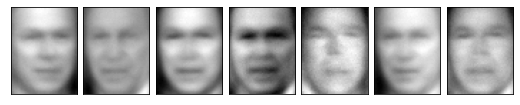

In [92]:
fig, ax = plt.subplots(1, 7, figsize=(9, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(7):
    ax[i].imshow(filtered[i].reshape(62, 47), cmap='binary_r')

Write your conclusion here:

PCA is used here as a filtering approach for noise induced on the face data. Components with variance greater than the effect of noise are relatively unaffected by it, and so reconstructing this data using the largest subset of principal components allows us to keep the signal without the noise. Checking attribute pca.n_components_ with each fitting, it can be seen that 80% of the variance amounts to 192 components, while 40% of the variance corresponds to 5 components.

## Problem 4: tSNE [15 marks]
In the following the digit dataset is loaded. The images and corresponsing labels are loaded in data and label variables

In [73]:
from sklearn.datasets import load_digits
digits = load_digits()
data = digits.data
label = digits.target
data.shape
label.shape

(1797,)

Use PCA and tSNE to obtain two-dimensional repesentations for this dataset. Use plt.scatter function to plot the 2-D representation of this dataset obtained by both PCA and tSNE method. Use labe information to assign distinct colors for data points in different classes. Based on the generated graphs, which one is a better method for visualization?

In [74]:
# Write your code to apply PCA here
pca = PCA(2)
proj = pca.fit_transform(data)
proj.shape

(1797, 2)

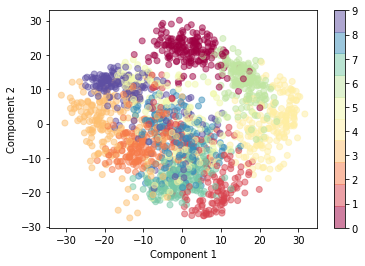

In [75]:
# Write your code to plot the scatter plot for 2-D represntation obtained from PCA here
plt.scatter(proj[:, 0], proj[:, 1], c=label, alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

In [76]:
# Write your code to apply TSNE here
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

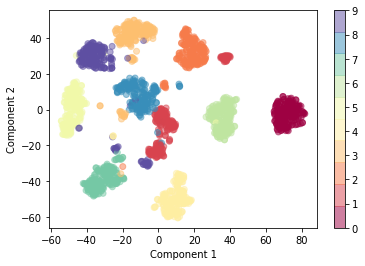

In [83]:
# Write your code to plot the scatter plot for 2-D represntation obtained from TSNE here
t = tsne.fit_transform(data)
plt.scatter(t[:, 0], t[:, 1], c=label, alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

Wrtie your conclusion about employing PCA and tSNE for data visualization

PCA is typically used as a dimensionality reduction technique in a data set which retains the most information. It correlates a set of features and provides a minimum number of variables to preserve maximal variation about the original distribution of data, using eigenvalues of the projected data matrix (major directions of variation in the space).

t-SNE is a method with a similar goal, used for high-dimensional data sets. Rather than a mathematical approach, it takes a probabilistic one which minimizes the divergence between two distributions. Through computation, it compares the pairwise similarities of inputs and pairwise similarities of the matching low-dimensional points.

As t-SNE scales in O(n^2), it can become slow and memory-intensive to use for data sets exceeding a few thousand records. Through practical application in this assignment, the discrepancy in time and memory efficiency was actually noticeable as compared with PCA (eigenvalue covariance matrix computation and eigenvalue decomposition is O(p^2n + p^3) for p features, n data points)